In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

krzywa_kalibracji = pd.read_csv('Krzywa_kalibracji.csv', sep =';')
deflection = np.array(krzywa_kalibracji['Deflection (V)'])
Z = np.array(krzywa_kalibracji['Z (um)'])

In [2]:
start_k = 700 #Początek naszego wektora wartości kalibracji
stop_k = 1000 #Koniec wektora kalibracji

zreg = np.array(Z[start_k:stop_k]) - Z[stop_k]
defreg = np.flip(deflection[start_k:stop_k] - deflection[start_k])

In [3]:
#Linear regression
defreg = defreg.reshape((-1, 1))

model = LinearRegression()
model.fit(defreg, zreg)
model = LinearRegression().fit(defreg, zreg)
r_sq = model.score(defreg, zreg)

print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

df_pred = model.predict(defreg)
df_pred = np.array(df_pred)

k = 0.02
f = model.coef_ * k * deflection #wynik w uN

coefficient of determination: 0.999965036469584
intercept: 0.0011457372206235827
slope: [0.13487433]


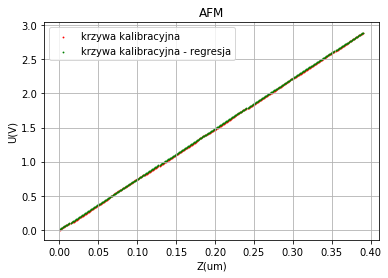

In [4]:
plt.figure(1)
plt.scatter(Z[start_k:stop_k] - Z[stop_k], np.flip(deflection[start_k:stop_k] - deflection[start_k]), s = 0.7, color ='r', label ='krzywa kalibracyjna')
plt.scatter(Z[start_k:stop_k] - Z[stop_k], (zreg / (model.coef_)), s = 0.7, color ='g', label ='krzywa kalibracyjna - regresja')
plt.legend()
plt.title('AFM')
plt.xlabel('Z(um)')
plt.ylabel('U(V)')
plt.grid(True)


In [42]:
krzywa = pd.read_csv('Krzywa.csv', sep=';')
deflection_krzywa = np.array(krzywa['Deflection (V)'])
Z_krzywa = np.array(krzywa['Z (um)'])

start = 685 #Przesunięcia krzywej swobodnie
stop = 745 #odcięcie do kawałka nas interesującego

In [43]:
z_krzywej = Z_krzywa[start:stop] - Z_krzywa[stop]
Z_kalibracja_nowa = np.flip(deflection_krzywa[start:stop] - deflection_krzywa[start]) * model.coef_

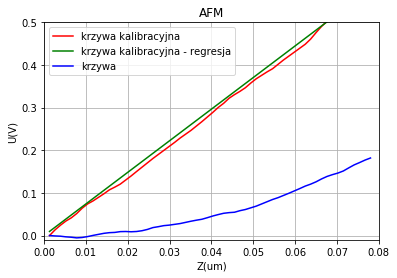

In [44]:
start_k = 700 #Początek naszego wektora wartości kalibracji
stop_k = 1000 #Koniec wektora kalibracji
plt.figure(2)
plt.plot(Z[start_k:stop_k] - Z[stop_k], np.flip(deflection[start_k:stop_k] - deflection[start_k]), color ='r', label ='krzywa kalibracyjna')
plt.plot(Z[start_k:stop_k] - Z[stop_k], (zreg / (model.coef_)), color ='g', label ='krzywa kalibracyjna - regresja')
plt.plot(Z_krzywa[start:stop] - Z_krzywa[stop], np.flip(deflection_krzywa[start:stop]) - deflection_krzywa[start], color ='b', label ='krzywa')
plt.legend()
# Tutaj używasz xlim i ylim do określenia co chcesz wyświetlać musisz to sobie empirycznie dobrać, ale to na luzie
plt.xlim(0, 0.08)
plt.ylim(-0.01, 0.5)
plt.title('AFM')
plt.xlabel('Z(um)')
plt.ylabel('U(V)')
plt.grid(True)


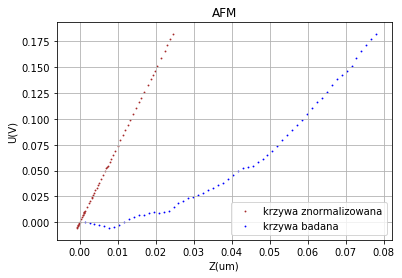

In [45]:
plt.scatter(Z_kalibracja_nowa, np.flip(deflection_krzywa[start:stop] - deflection_krzywa[start]), s = 0.7, color ='brown', label ='krzywa znormalizowana')
plt.scatter(Z_krzywa[start:stop] - Z_krzywa[stop], np.flip(deflection_krzywa[start:stop]) - deflection_krzywa[start], s = 0.7, color ='b', label ='krzywa badana')
plt.legend()
plt.title('AFM')
plt.xlabel('Z(um)')
plt.ylabel('U(V)')
plt.grid(True)

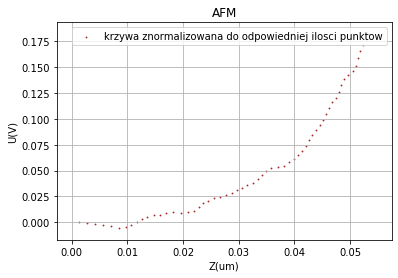

In [46]:
delta_z = abs(z_krzywej - Z_kalibracja_nowa)

plt.figure(3)
plt.scatter(delta_z, np.flip(deflection_krzywa[start:len(delta_z) + start] - deflection_krzywa[start]), s = 0.7, color ='brown', label ='krzywa znormalizowana do odpowiedniej ilosci punktow')
plt.legend()
plt.title('AFM')
plt.xlabel('Z(um)')
plt.ylabel('U(V)')
plt.grid(True)

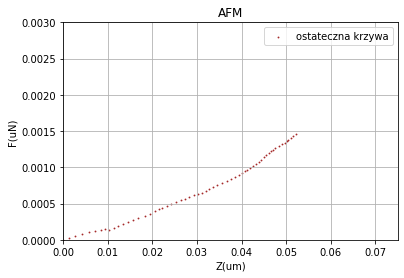

In [47]:
przesuniecie = len(delta_z)-1
force = np.flip(f[start:len(delta_z) + start]) - f[start]
plt.figure(4)
plt.scatter(np.flip(delta_z)-delta_z[przesuniecie], np.flip(force), s = 0.7, color = 'brown', label = 'ostateczna krzywa')
plt.legend()
# Tutaj używasz xlim i ylim do określenia co chcesz wyświetlać musisz to sobie empirycznie dobrać, ale to na luzie
plt.xlim(0, 0.075)
plt.ylim(0, 0.003)
plt.title('AFM')
plt.xlabel('Z(um)')
plt.ylabel('F(uN)')
plt.grid(True)

In [60]:
def fit(x, a, b):
    return a*x**b

def fit_2(x, a):
    return a*x**2

def fit_1_5(x, a):
    return a*x**1.5

A, M_cov = curve_fit(fit, np.flip(delta_z), np.flip(force))
print("Współczynnik kierunkowy", A[0])
print("Odchylenie standardowe współczynnik kierunkowego", np.sqrt(np.diag(M_cov))[0])
print("Potega", A[1])
print("Odchylenie standardowe potegi", np.sqrt(np.diag(M_cov))[1])

A_2, M_cov_2 = curve_fit(fit_2, np.flip(delta_z), np.flip(force))
print("Współczynnik kierunkowy dla ustalonego wykladnika 2", A_2[0])
print("Odchylenie standardowe współczynnik kierunkowego dla ustalonego wykladnika 2", np.sqrt(np.diag(M_cov_2))[0])

A_1_5, M_cov_1_5 = curve_fit(fit_1_5, np.flip(delta_z), np.flip(force))
print("Współczynnik kierunkowy dla ustalonego wykladnika 1.5", A_1_5[0])
print("Odchylenie standardowe współczynnik kierunkowego dla ustalonego wykladnika 1.5", np.sqrt(np.diag(M_cov_1_5))[0])


v = 0.5
alfa = 5*np.pi/36
R = 50*10**-3 # w mikrometrach

Współczynnik kierunkowy 0.11773362418291297
Odchylenie standardowe współczynnik kierunkowego 0.007095228377043556
Potega 1.5084346972462428
Odchylenie standardowe potegi 0.019241315617090565
Współczynnik kierunkowy dla ustalonego wykladnika 2 0.5395207807860548
Odchylenie standardowe współczynnik kierunkowego dla ustalonego wykladnika 2 0.006813057827379416
Współczynnik kierunkowy dla ustalonego wykladnika 1.5 0.11467061218423713
Odchylenie standardowe współczynnik kierunkowego dla ustalonego wykladnika 1.5 0.00046990996242117787


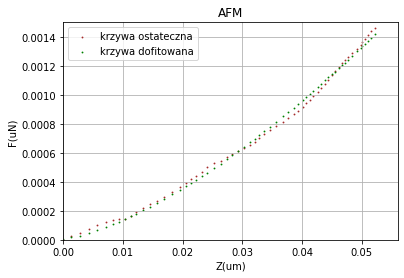

In [61]:
plt.figure(5)
plt.scatter(np.flip(delta_z)-delta_z[przesuniecie], np.flip(force), s=0.7, color = 'brown', label = 'krzywa ostateczna')
plt.scatter(np.flip(delta_z)-delta_z[przesuniecie], (np.flip(delta_z)**A[1])*A[0], s=0.7, color = 'g', label = 'krzywa dofitowana')
plt.legend()
# Tutaj używasz xlim i ylim do określenia co chcesz wyświetlać musisz to sobie empirycznie dobrać, ale to na luzie
plt.xlim(0, 0.056)
plt.ylim(0, 0.0015)
plt.title('AFM')
plt.xlabel('Z(um)')
plt.ylabel('F(uN)')
plt.grid(True)

In [62]:
#Dokładnie wyliczone wartości już do empirycznego nakładania fitów(tutaj bierzemy odpowiednio od potęgi nas interesującej)
E1 = (A[0]*3*(1-v**2))/(4*np.sqrt(R))
var_E1 = (np.sqrt(np.diag(M_cov))[0]*3*(1-v**2))/(4*np.sqrt(R))

E2 = A[0]*np.pi*(1-v**2)/(2*np.tan(alfa))
var_E2 = np.sqrt(np.diag(M_cov))[1]*np.pi*(1-v**2)/(2*np.tan(alfa))

print('Moduł Younga dla piramidalnego:', E2, '[MPa]')
print('Odchylenie standardowe dla piramidalnego:', var_E2, '[MPa]')

print('Moduł Younga dla sferycznego', E1, '[MPa]')
print('Odchylenie standardowe dla sferycznego:', var_E1, '[MPa]')

Moduł Younga dla piramidalnego: 0.29744666612139165 [MPa]
Odchylenie standardowe dla piramidalnego: 0.04861198507914181 [MPa]
Moduł Younga dla sferycznego 0.2961679352742074 [MPa]
Odchylenie standardowe dla sferycznego: 0.017848589587824263 [MPa]


In [63]:
#Wyznaczone wartości przy ustalonym wykładniku w tym wypadku 2 

Ep = (A_2[0]*3*(1-v**2))/(4*np.sqrt(R))
var_E1 = (np.sqrt(np.diag(M_cov_2))[0]*3*(1-v**2))/(4*np.sqrt(R))

print('Moduł Younga dla piramidalnego:', Ep, '[MPa]')
print('Odchylenie standardowe dla piramidalnego:', var_Ep, '[MPa]')

Moduł Younga dla piramidalnego: 1.3572057837503038 [MPa]
Odchylenie standardowe dla piramidalnego: 0.017105920027873388 [MPa]


In [64]:
#Wyznaczone wartości przy ustalonym wykładniku w tym wypadku 1.5

Es = (A_1_5[0]*3*(1-v**2))/(4*np.sqrt(R))
var_Es = np.sqrt(np.diag(M_cov_1_5))[0]*np.pi*(1-v**2)/(2*np.tan(alfa))

print('Moduł Younga dla sferycznego:', Es, '[MPa]')
print('Odchylenie standardowe dla sferycznego:', var_Es, '[MPa]')

Moduł Younga dla sferycznego: 0.2884626943486536 [MPa]
Odchylenie standardowe dla sferycznego: 0.0011871982423836186 [MPa]
